## Import Necessary Packages

In [1]:
import numpy as np
import xarray as xr
import proplot as pplt
pplt.rc.update({'font.size':12})
import warnings
warnings.filterwarnings('ignore')

## User-Defined Fields

In [2]:
path   = # '/directory/where/large/domain/files/are/located/'
dirout = 'analysis'
cases  = ['nz_32','nz_64','nz_128']

## Plot Fig. 8

For each case, load in the corresponding Eq. 3 budget terms netCDF file. Plot the tendency (left column) and time-integrated tendency(right column) of each term, comparing by case.

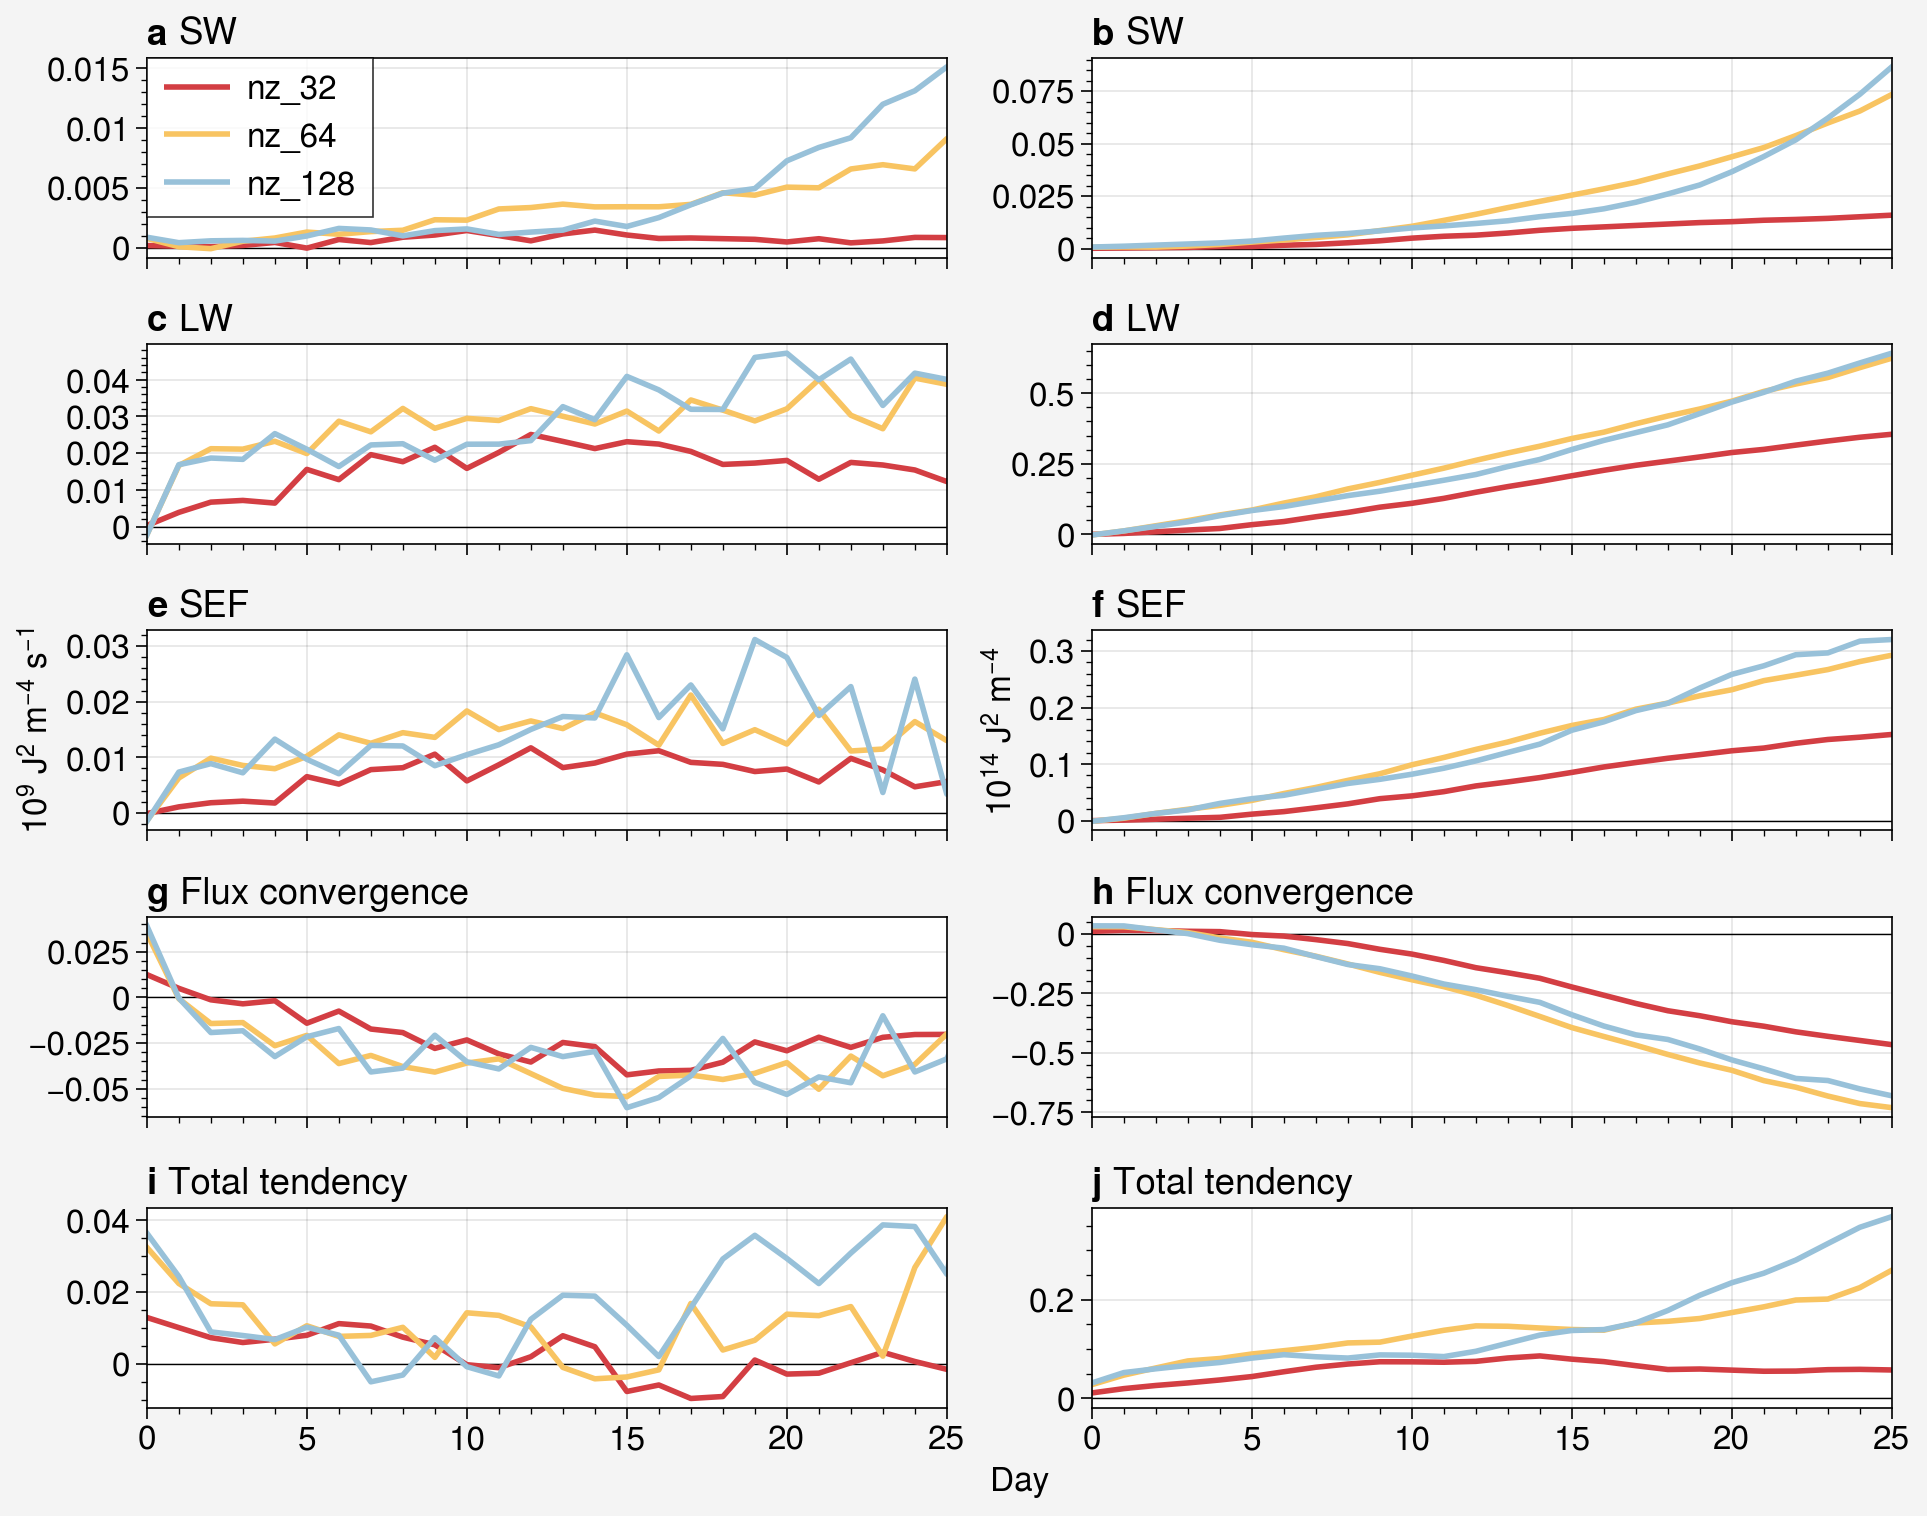

In [3]:
terms=['SW','LW','SEF','Flux convergence','Total tendency']
cmap=np.asarray([[211,62,67,255],[248,196,98,255],[152,193,217,255]])/255; linewidth=2
fig,axs = pplt.subplots(nrows=5,ncols=2,refheight=1,refwidth=4,sharex=True,sharey=False)
axs.format(xlabel='Day',xlim=(0,25),xticks=5,ylabel='',abc='a',abcloc='l',titleloc='l')
axs.axhline(0,linewidth=0.5,color='k')
axs[0].format(title='SW',yticks=0.005)
axs[2].format(title='LW',yticks=0.01)
axs[4].format(title='SEF',yticks=0.01)
axs[6].format(title='Flux convergence',yticks=0.025)
axs[8].format(title='Total tendency',yticks=0.02)
axs[1].format(title='SW',yticks=0.025)
axs[3].format(title='LW',yticks=0.25)
axs[5].format(title='SEF',yticks=0.1)
axs[7].format(title='Flux convergence',yticks=0.25)
axs[9].format(title='Total tendency',yticks=0.2)
for i,case in enumerate(cases):
    # Load budget terms file
    ds = xr.load_dataset(path+dirout+'/eq3_fmse_budget_vars_'+case+'.nc')
    # Plot tendendency of budget terms
    axs[0].plot(ds.SW,color=cmap[i],linewidth=linewidth)
    axs[2].plot(ds.LW,color=cmap[i],linewidth=linewidth)
    axs[4].plot(ds.SEF,color=cmap[i],linewidth=linewidth)
    axs[6].plot(ds.flux_conv,color=cmap[i],linewidth=linewidth)
    axs[8].plot(ds.total_tend,color=cmap[i],linewidth=linewidth)
    # Plot time-integrated tendency of budget terms
    axs[1].plot(np.cumsum(ds.SW)*86400/1e5,color=cmap[i],linewidth=linewidth)
    axs[3].plot(np.cumsum(ds.LW)*86400/1e5,color=cmap[i],linewidth=linewidth)
    axs[5].plot(np.cumsum(ds.SEF)*86400/1e5,color=cmap[i],linewidth=linewidth)
    axs[7].plot(np.cumsum(ds.flux_conv)*86400/1e5,color=cmap[i],linewidth=linewidth)
    axs[9].plot(np.cumsum(ds.total_tend)*86400/1e5,color=cmap[i],linewidth=linewidth)
axs[4].set_ylabel('10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[5].set_ylabel('10$^{14}$ J$^{2}$ m$^{-4}$')
axs[0].legend(ncols=1,labels=cases)